# Import Packages

In [1]:
import FlowCal

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
from tkinter.filedialog import askdirectory
import tkinter as tk
from ipywidgets import interact, widgets, fixed, interactive, HBox, Layout
import pickle
from sklearn.metrics import auc
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# Load Data

In [2]:
mainP = 'C:/IBECPostDocDrive/2024_01_16_NCvsKR/Paper/FlowCytometry/251014 Lluis/'

fls = os.listdir(mainP)
flsFC = [fls[i] for i in range(len(fls)) if fls[i][-3::] != 'PDF' and fls[i] != 'Plots']

# 'C6' in flsFC[0]

In [3]:
dats = {}
datsGt1 = {}
datsGt2 = {}
for i in range(len(flsFC)):
    dats[flsFC[i]] = FlowCal.transform.to_rfi(FlowCal.io.FCSData(mainP+flsFC[i]))
    
    datsGt1[flsFC[i]] = FlowCal.gate.high_low(dats[flsFC[i]], channels=['FS INT LIN', 'FL6 INT LOG'])

    datsGt2[flsFC[i]] = FlowCal.gate.density2d(datsGt1[flsFC[i]],
                                channels=['FS INT LIN', 'FL6 INT LOG'],
                                gate_fraction=0.9,
                                full_output=True)

c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 550759)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 574198)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 591442)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 567034)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data se

# Display Data

<Figure size 640x480 with 0 Axes>

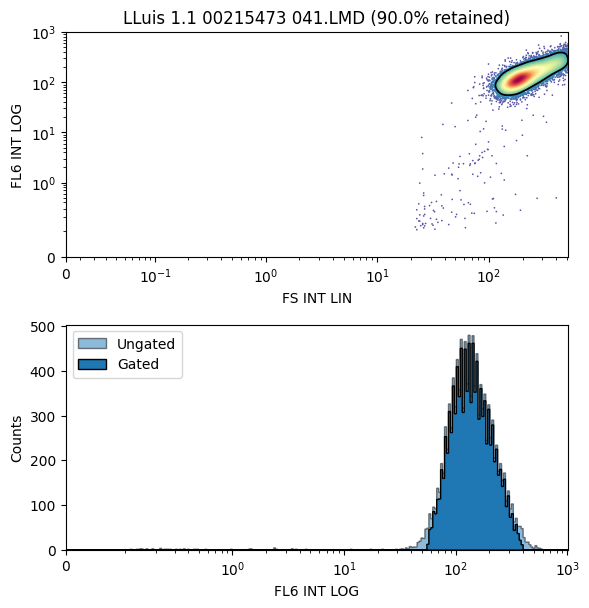

<Figure size 640x480 with 0 Axes>

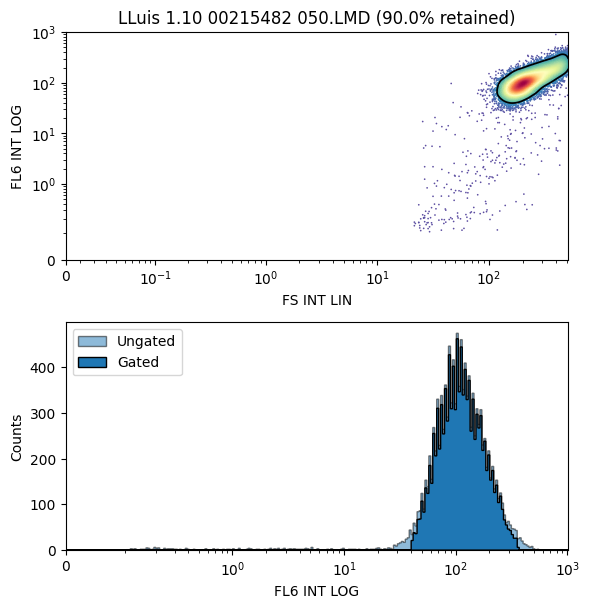

<Figure size 640x480 with 0 Axes>

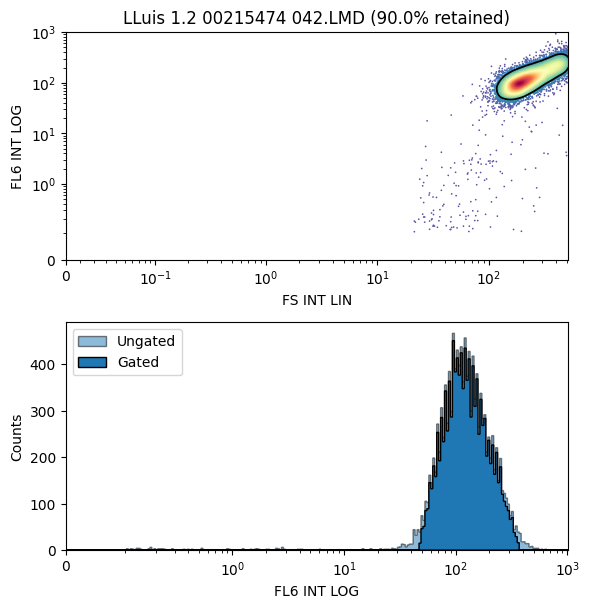

<Figure size 640x480 with 0 Axes>

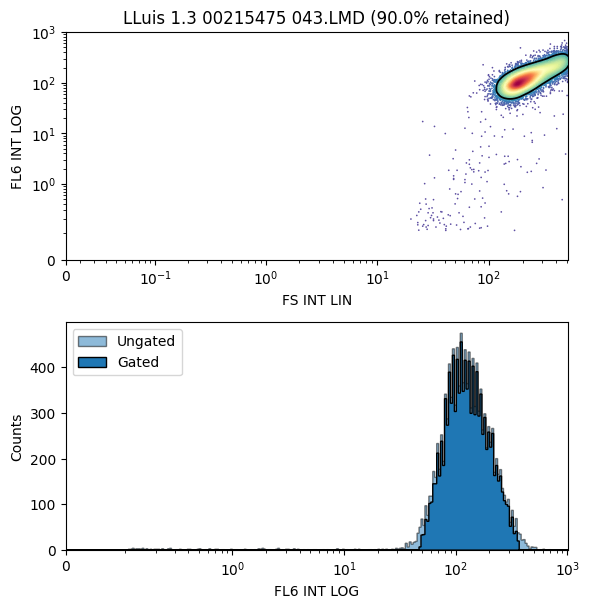

<Figure size 640x480 with 0 Axes>

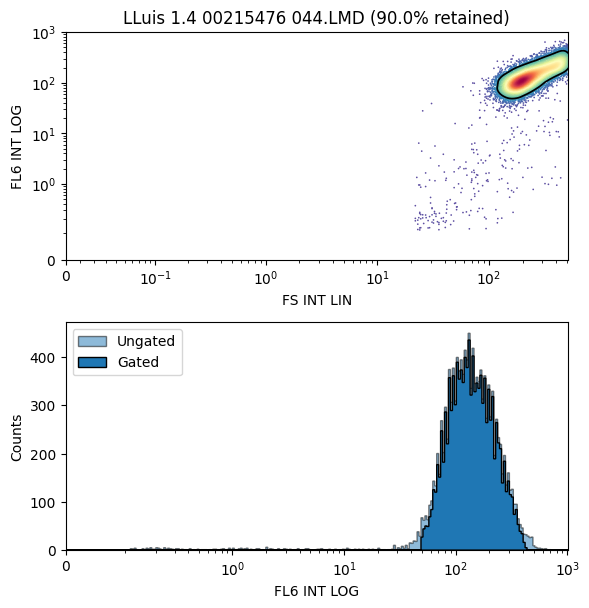

<Figure size 640x480 with 0 Axes>

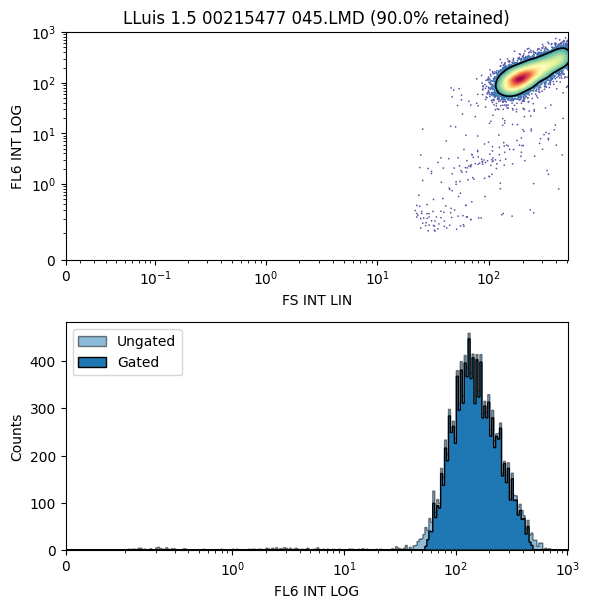

<Figure size 640x480 with 0 Axes>

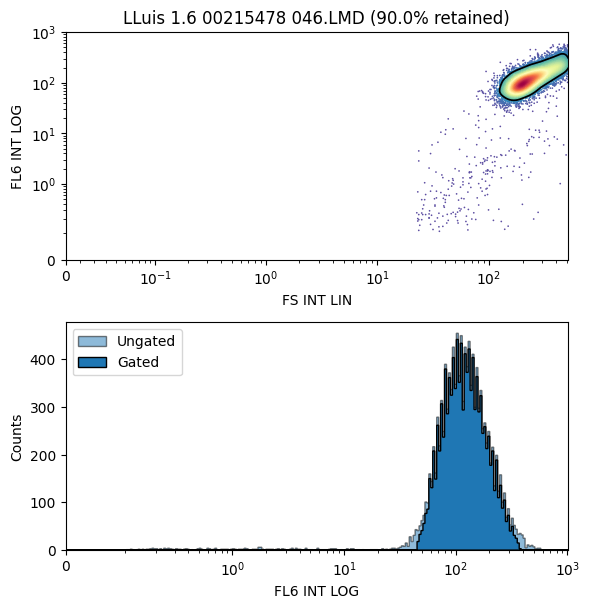

<Figure size 640x480 with 0 Axes>

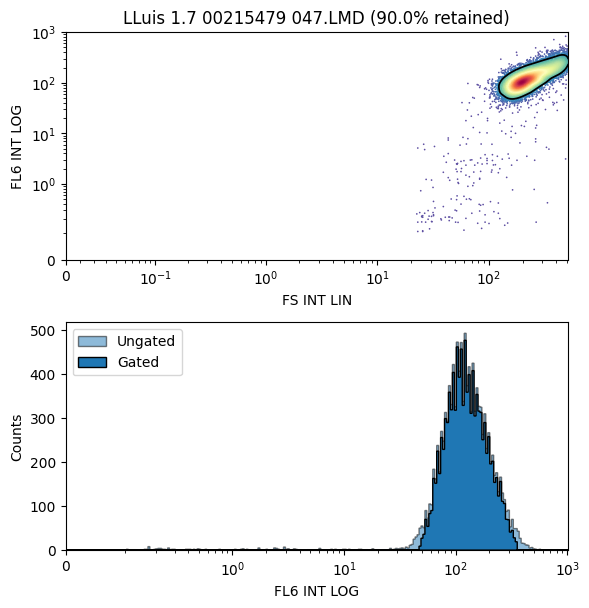

<Figure size 640x480 with 0 Axes>

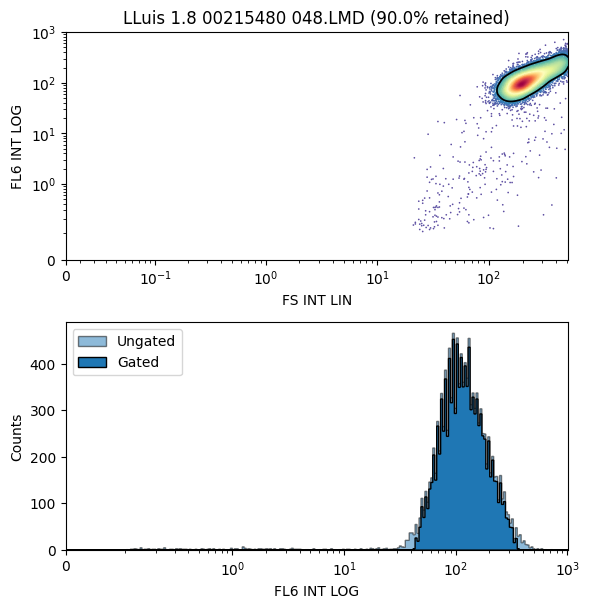

<Figure size 640x480 with 0 Axes>

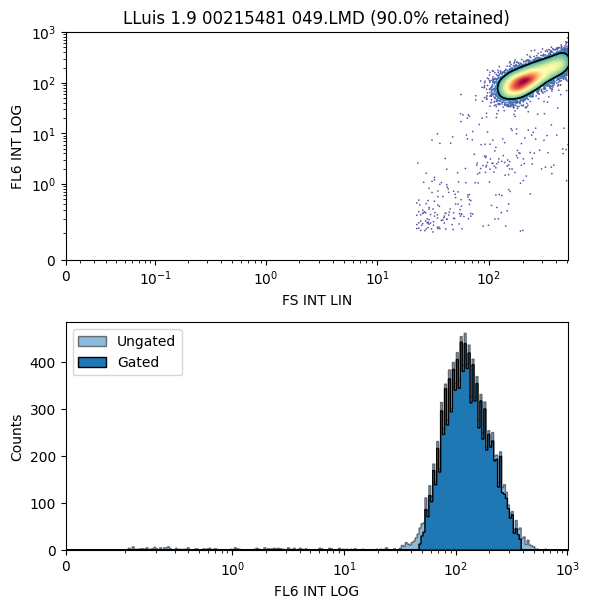

<Figure size 640x480 with 0 Axes>

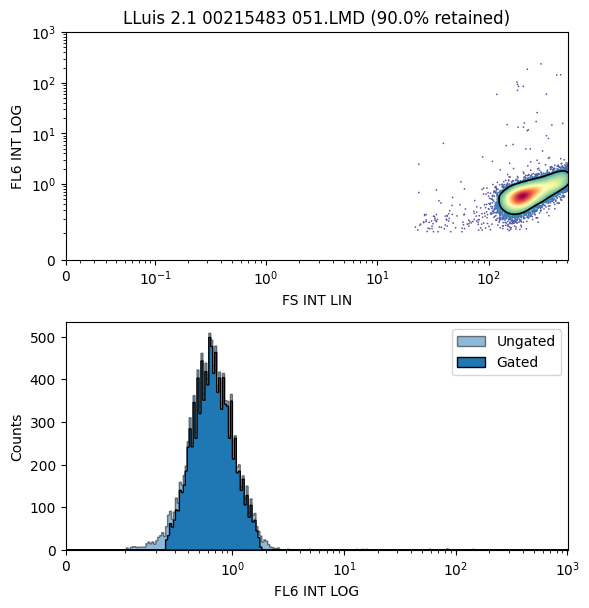

<Figure size 640x480 with 0 Axes>

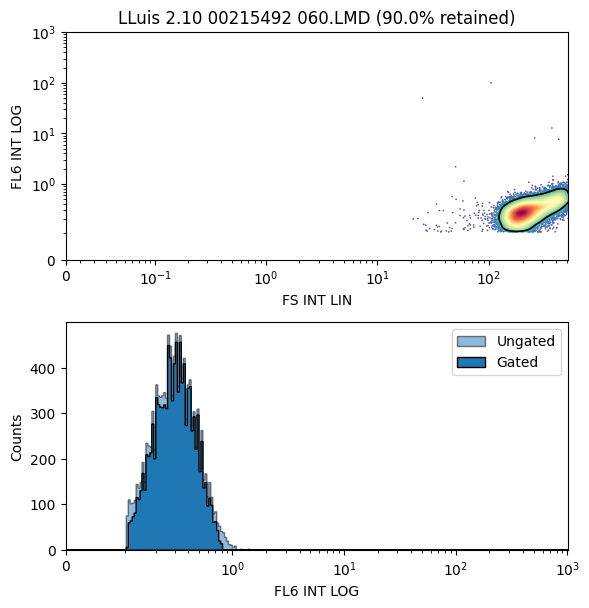

<Figure size 640x480 with 0 Axes>

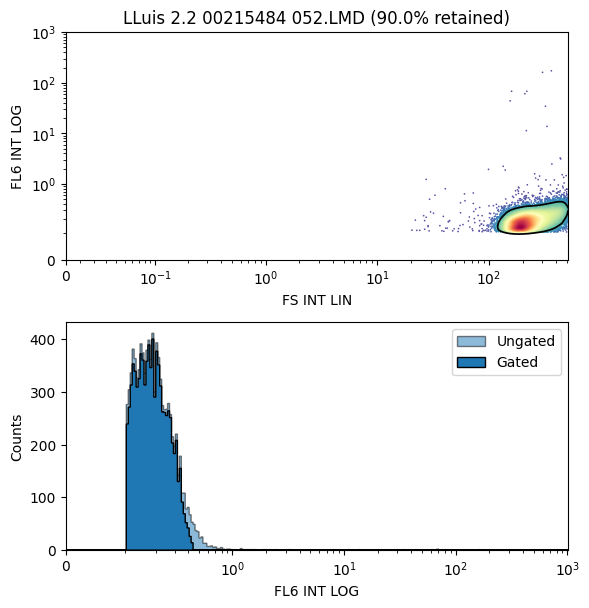

<Figure size 640x480 with 0 Axes>

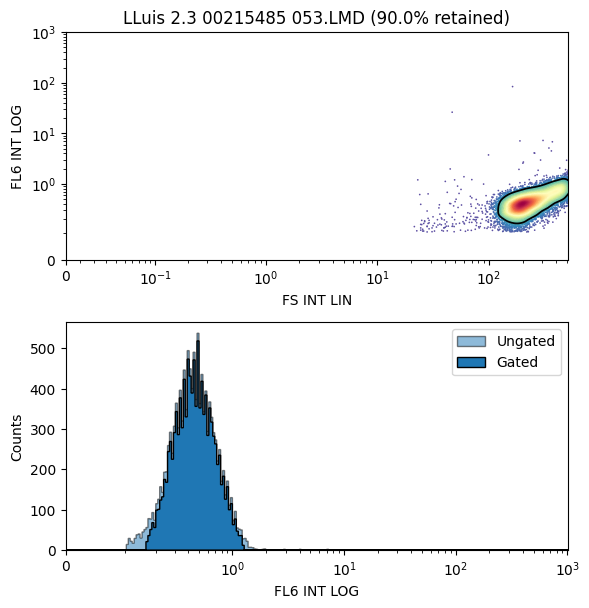

<Figure size 640x480 with 0 Axes>

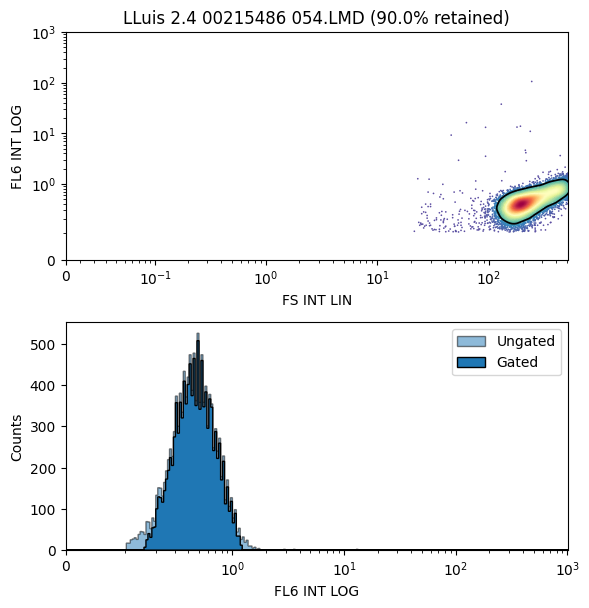

<Figure size 640x480 with 0 Axes>

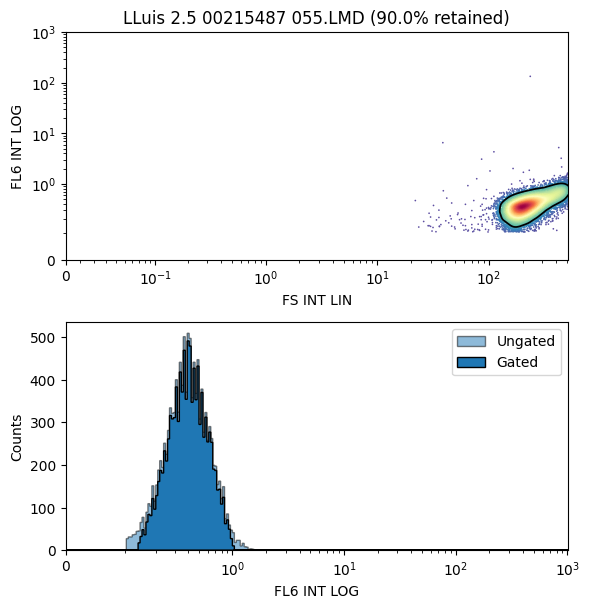

<Figure size 640x480 with 0 Axes>

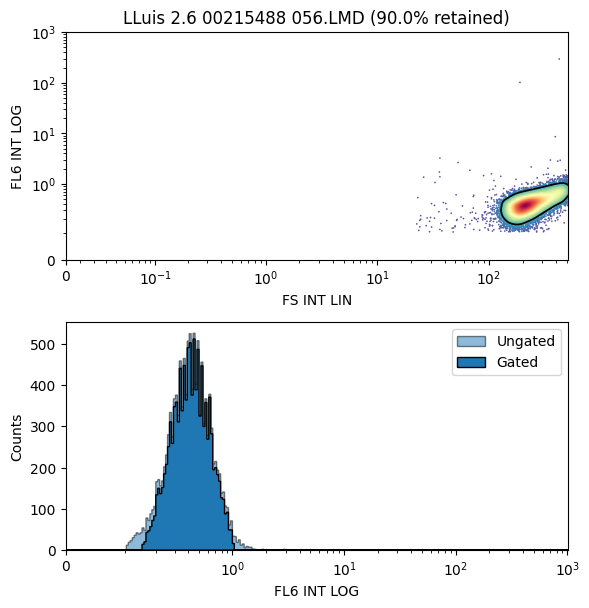

<Figure size 640x480 with 0 Axes>

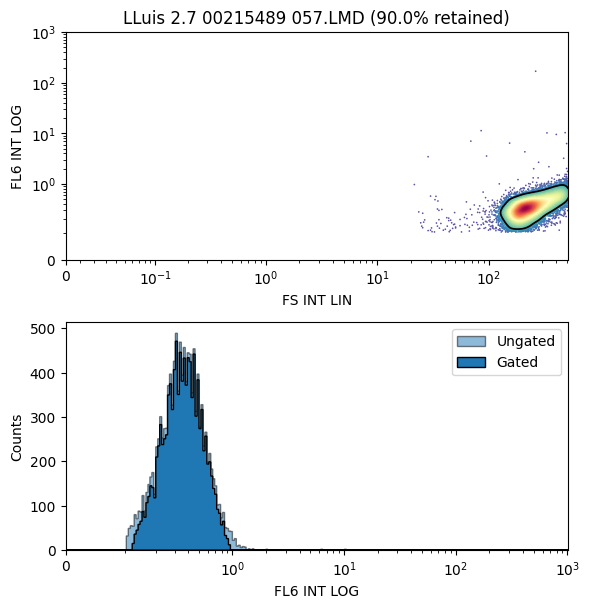

<Figure size 640x480 with 0 Axes>

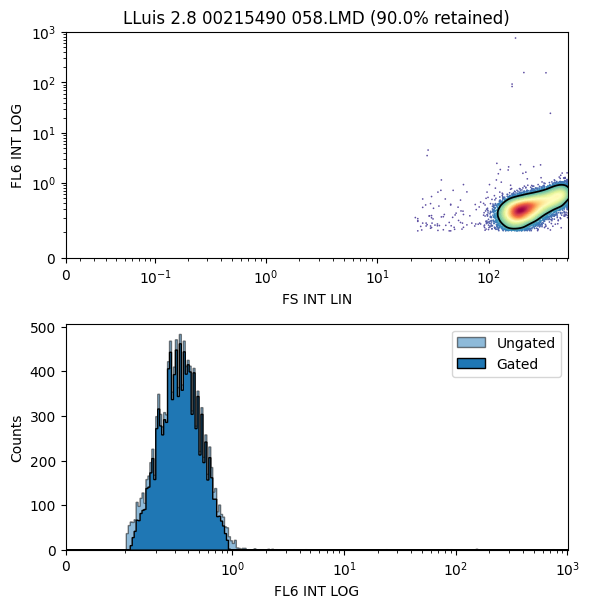

<Figure size 640x480 with 0 Axes>

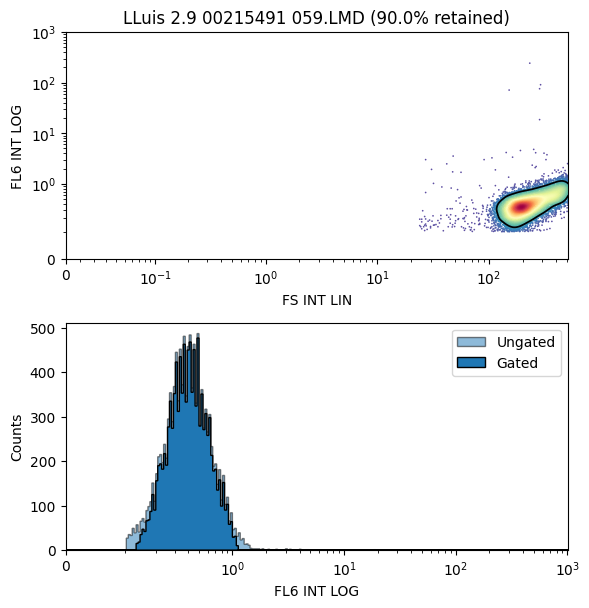

<Figure size 640x480 with 0 Axes>

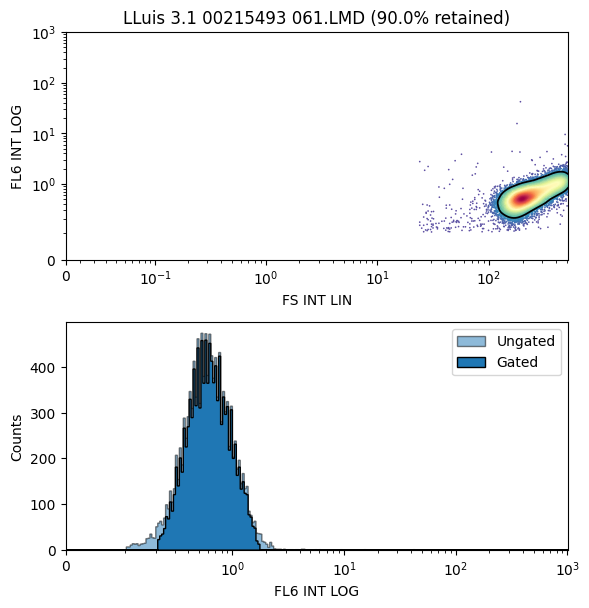

<Figure size 640x480 with 0 Axes>

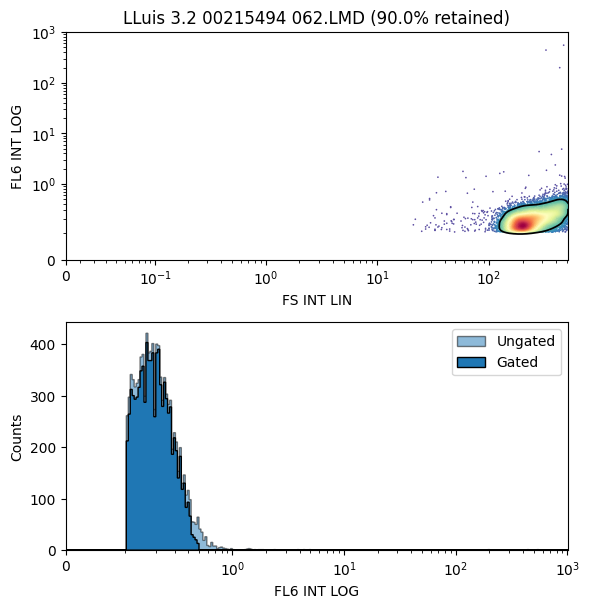

<Figure size 640x480 with 0 Axes>

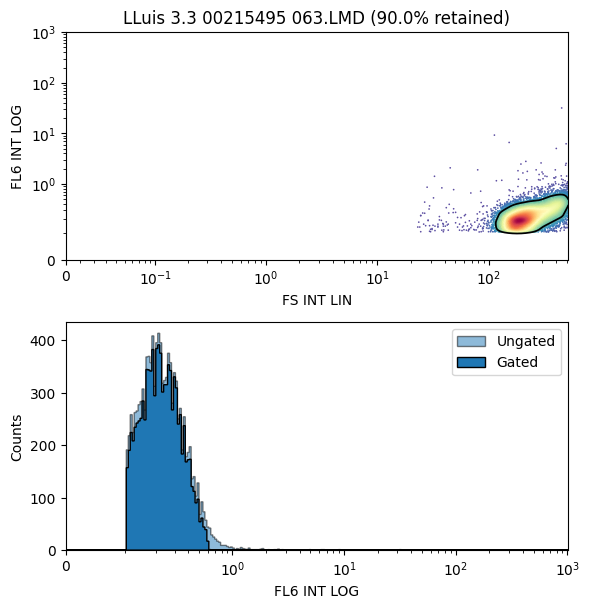

<Figure size 640x480 with 0 Axes>

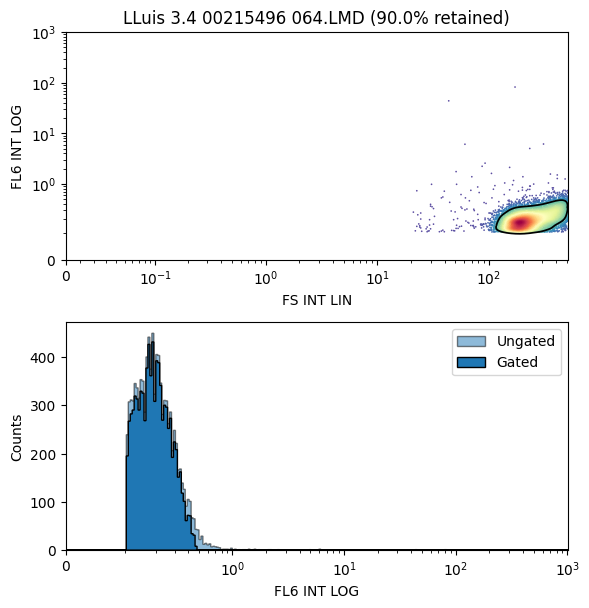

<Figure size 640x480 with 0 Axes>

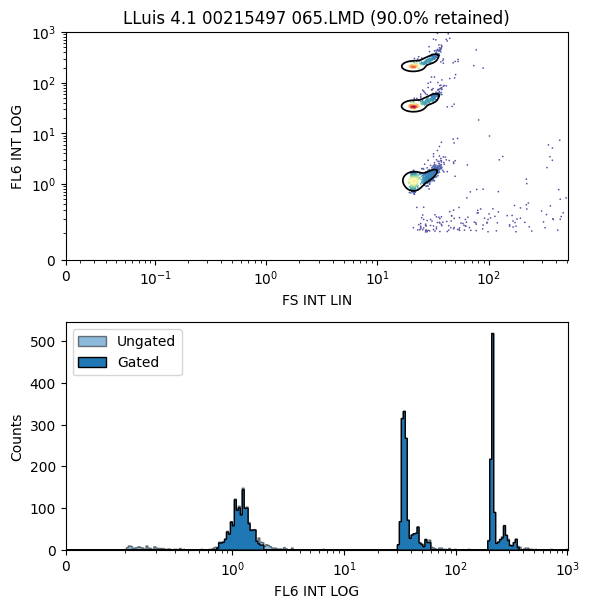

<Figure size 640x480 with 0 Axes>

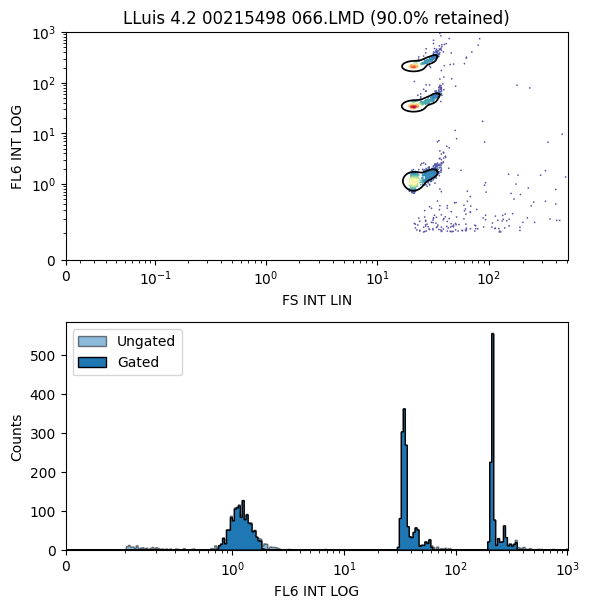

<Figure size 640x480 with 0 Axes>

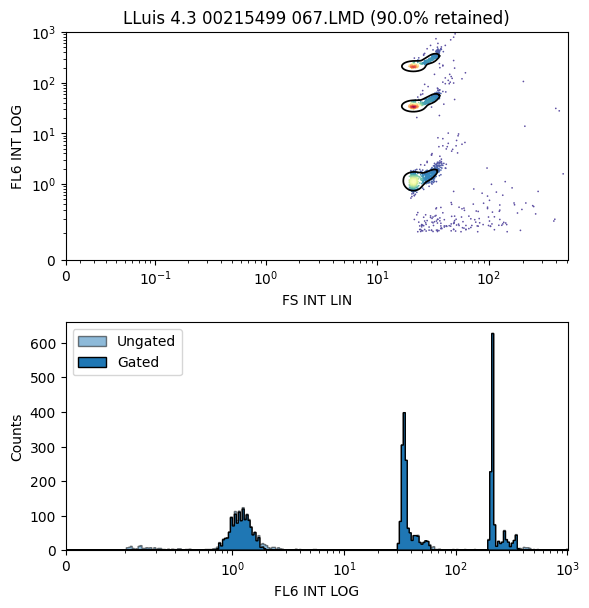

<Figure size 640x480 with 0 Axes>

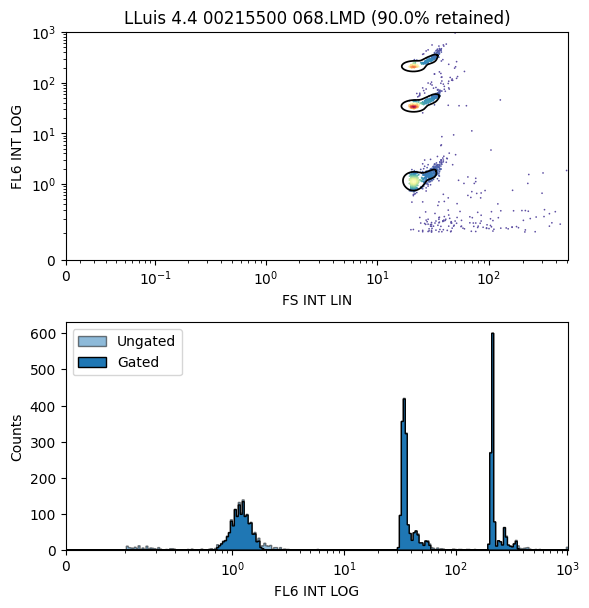

In [9]:
if os.path.isdir(mainP+'Plots/') == False:
    os.mkdir(mainP+'Plots/')

for i in range(len(flsFC)):

    plt.ioff()

    fig = plt.figure()
    FlowCal.plot.density_and_hist(datsGt1[flsFC[i]],
                                gated_data=datsGt2[flsFC[i]].gated_data,
                                gate_contour=datsGt2[flsFC[i]].contour,
                                density_channels=['FS INT LIN', 'FL6 INT LOG'],
                                density_params={'mode':'scatter'},
                                hist_channels=['FL6 INT LOG'])
    plt.tight_layout()
    
    
    plt.savefig(mainP+'Plots/'+flsFC[i][0:-4]+'.png')
    plt.show()

# Beads Calibration

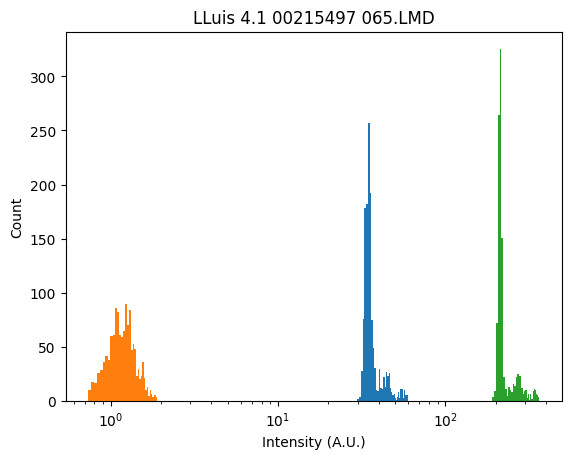

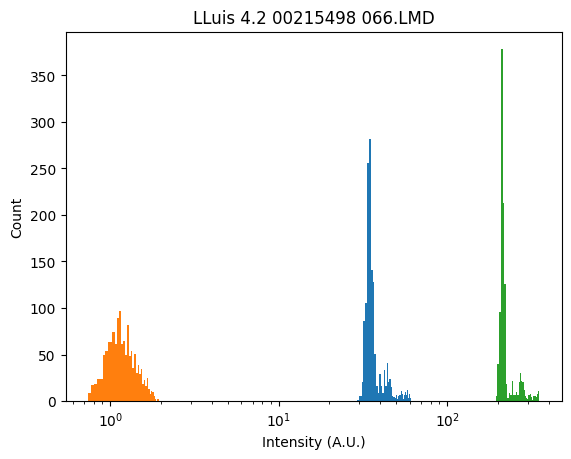

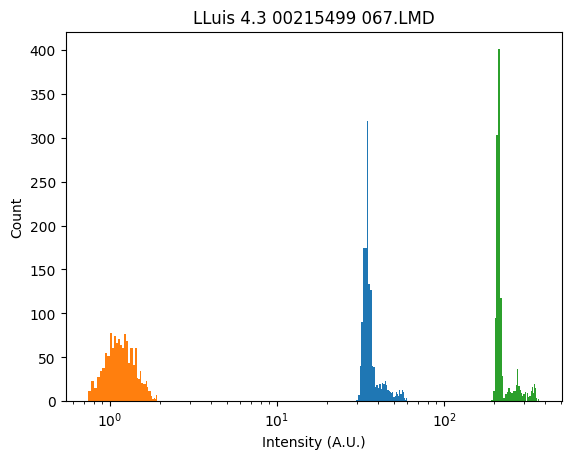

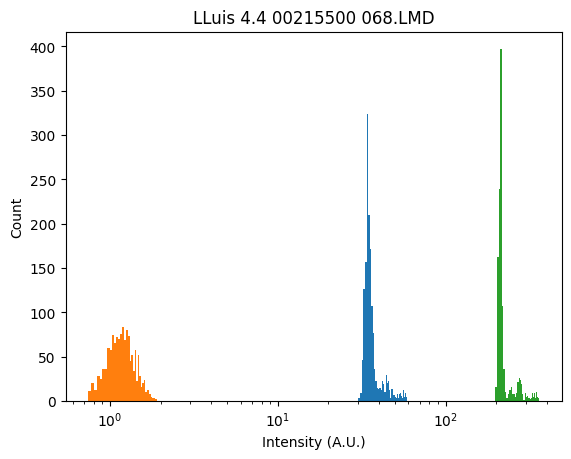

In [4]:
C6L = [flsFC[i] for i in range(len(flsFC)) if ' 4.' in flsFC[i]]

beadsMean = {}

beadsMeanM = np.zeros((len(C6L), 3))

i = 0 # Sample

for i in range(len(C6L)):

    beadsMean[C6L[i]] = np.zeros(3)
    tmp = 0

    plt.figure()

    k = -4 # Peak
    for k in list(  range(len(datsGt2[C6L[i]].contour)+1)  ) [-4:-1] :

        xx = [datsGt2[C6L[i]].contour[-k][j][0]  for j in range(len(datsGt2[C6L[i]].contour[-k])) ]
        yy = [datsGt2[C6L[i]].contour[-k][j][1]  for j in range(len(datsGt2[C6L[i]].contour[-k])) ]

        gtFSdw = datsGt2[C6L[i]].gated_data[::, 'FS INT LIN'] > np.min(xx)
        gtFSup = datsGt2[C6L[i]].gated_data[::, 'FS INT LIN'] < np.max(xx)
        gtFS = np.logical_and(gtFSdw,   gtFSup)

        gtFLdw = datsGt2[C6L[i]].gated_data[::, 'FL6 INT LOG'] > np.min(yy)
        gtFLup = datsGt2[C6L[i]].gated_data[::, 'FL6 INT LOG'] < np.max(yy)
        gtFL = np.logical_and(gtFLdw,   gtFLup)

        gtAl = np.logical_and(gtFS, gtFL)

        beadsMean[C6L[i]][tmp] = np.mean(datsGt2[C6L[i]].gated_data[::, 'FL6 INT LOG'][gtAl])
        tmp += 1

        plt.hist(datsGt2[C6L[i]].gated_data[::, 'FL6 INT LOG'][gtAl], bins =round(np.sqrt(len(datsGt2[C6L[i]].gated_data[::, 'FL6 INT LOG'][gtAl]))))
        
        # FlowCal.plot.hist1d(datsGt2[C6L[i]].gated_data[gtAl], channel='FL6 INT LOG')

    beadsMean[C6L[i]] = np.sort(beadsMean[C6L[i]])
    beadsMeanM[i,::] = np.sort(beadsMean[C6L[i]])

    plt.ylabel("Count")
    plt.xlabel("Intensity (A.U.)")
    plt.title(C6L[i])
    plt.xscale('log')
    plt.show()

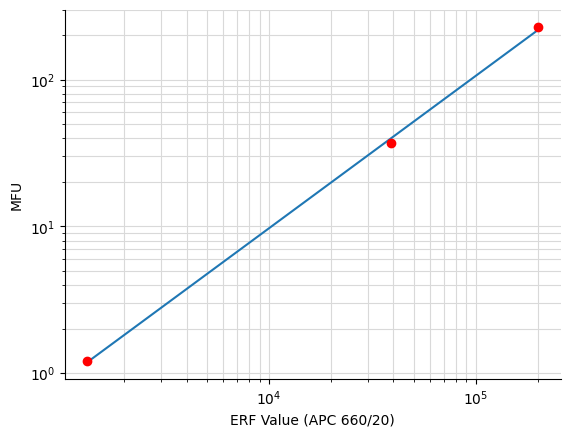

In [5]:
FITC = [1.32*(10**3), 3.91*(10**4), 2*(10**5)]

y = np.log(  np.reshape(beadsMeanM, np.shape(beadsMeanM)[0]*np.shape(beadsMeanM)[1])  )
x = np.log(  FITC*np.shape(beadsMeanM)[0]  )

slope, intercept, r, p, std_err = sp.stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, np.log(FITC)))




fig, ax = plt.subplots()
ax.grid(True, which="both", color='0.85')
ax.set_axisbelow(True)

ax.plot( np.arange(np.min(FITC), np.max(FITC)) ,   np.exp(myfunc(np.log(np.arange(np.min(FITC), np.max(FITC)))))   )

ax.errorbar(FITC, np.mean(beadsMeanM, axis=0), yerr=np.std(beadsMeanM, axis=0), fmt='o', c='red')

ax.set_ylabel('MFU')
ax.set_xlabel('ERF Value (APC 660/20)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.spines[['right', 'top']].set_visible(False)
plt.show()

# Extract and Display Data

In [6]:
CnsMean = {} # Data With Means of each replicate
CnsMode = {} # Data with Modes of each replicate
CnsAllT = {} # All data of all replicates together
CnsRepT = {} # All data with replicates per separate

### Blank

In [7]:
BlankFils = [flsFC[i] for i in range(len(flsFC)) if ' 3.' in flsFC[i]]

CnsMean['Blank'] = np.zeros(len(BlankFils))
CnsMode['Blank'] = np.zeros(len(BlankFils))
CnsAllT['Blank'] = []
CnsRepT['Blank'] = {}

for z in range(len(BlankFils)):
    CnsMean['Blank'][z] = np.mean(datsGt2[BlankFils[z]].gated_data[::, 'FL6 INT LOG'])
    CnsMode['Blank'][z] = sp.stats.mode(datsGt2[BlankFils[z]].gated_data[::, 'FL6 INT LOG'])[0]
    CnsAllT['Blank'] = np.concatenate((CnsAllT['Blank'],  np.array(datsGt2[BlankFils[z]].gated_data[::, 'FL6 INT LOG'])))
    CnsRepT['Blank'][z] = datsGt2[BlankFils[z]].gated_data[::, 'FL6 INT LOG']

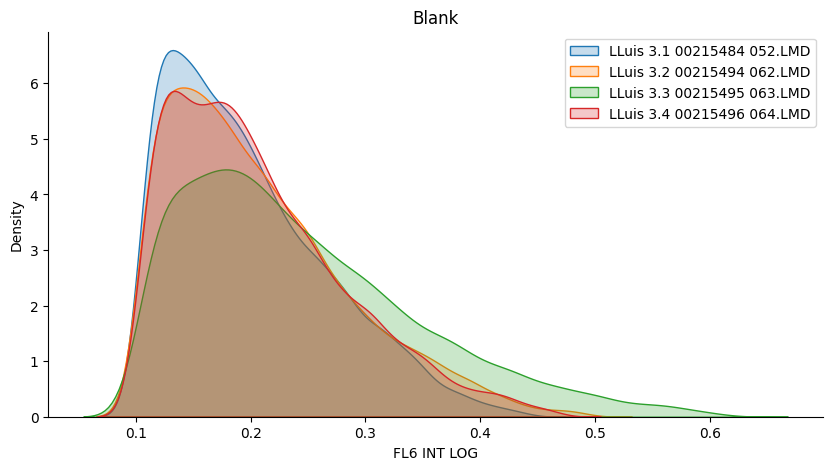

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(CnsRepT['Blank'])):
    sns.kdeplot(data=CnsRepT['Blank'][i], label = BlankFils[i], fill=True)

ax.set_xlabel("FL6 INT LOG")
ax.set_title("Blank")
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xscale('log')
ax.legend()
plt.show()

### Isotype

In [9]:
IsotypeFils = [flsFC[i] for i in range(len(flsFC)) if ' 2.' in flsFC[i]]

CnsMean['Iso'] = np.zeros(len(IsotypeFils))
CnsMode['Iso'] = np.zeros(len(IsotypeFils))
CnsAllT['Iso'] = []
CnsRepT['Iso'] = {}

for z in range(len(IsotypeFils)):
    CnsMean['Iso'][z] = np.mean(datsGt2[IsotypeFils[z]].gated_data[::, 'FL6 INT LOG'])
    CnsMode['Iso'][z] = sp.stats.mode(datsGt2[IsotypeFils[z]].gated_data[::, 'FL6 INT LOG'])[0]
    CnsAllT['Iso'] = np.concatenate((CnsAllT['Iso'],  np.array(datsGt2[IsotypeFils[z]].gated_data[::, 'FL6 INT LOG'])))
    CnsRepT['Iso'][z] = datsGt2[IsotypeFils[z]].gated_data[::, 'FL6 INT LOG']

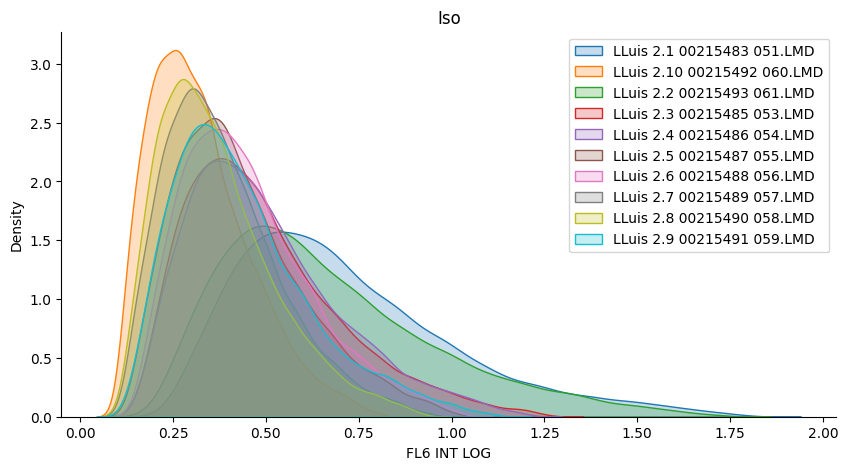

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(CnsRepT['Iso'])):
    sns.kdeplot(data=CnsRepT['Iso'][i], label = IsotypeFils[i], fill=True)

ax.set_xlabel("FL6 INT LOG")
ax.set_title("Iso")
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xscale('log')
ax.legend()
plt.show()

### Fluo Sample

In [11]:
FluoFils = [flsFC[i] for i in range(len(flsFC)) if ' 1.' in flsFC[i]]

CnsMean['Fluo'] = np.zeros(len(FluoFils))
CnsMode['Fluo'] = np.zeros(len(FluoFils))
CnsAllT['Fluo'] = []
CnsRepT['Fluo'] = {}

for z in range(len(FluoFils)):
    CnsMean['Fluo'][z] = np.mean(datsGt2[FluoFils[z]].gated_data[::, 'FL6 INT LOG'])
    CnsMode['Fluo'][z] = sp.stats.mode(datsGt2[FluoFils[z]].gated_data[::, 'FL6 INT LOG'])[0]
    CnsAllT['Fluo'] = np.concatenate((CnsAllT['Fluo'],  np.array(datsGt2[FluoFils[z]].gated_data[::, 'FL6 INT LOG'])))
    CnsRepT['Fluo'][z] = datsGt2[FluoFils[z]].gated_data[::, 'FL6 INT LOG']

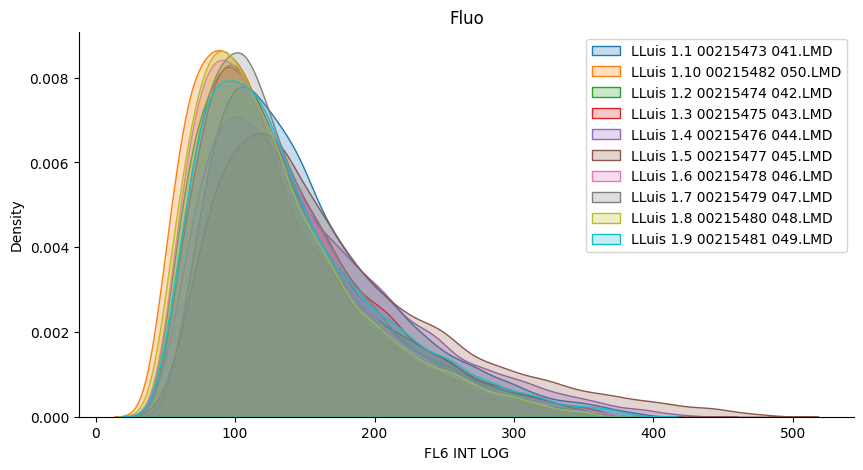

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(CnsRepT['Fluo'])):
    sns.kdeplot(data=CnsRepT['Fluo'][i], label = FluoFils[i], fill=True)

ax.set_xlabel("FL6 INT LOG")
ax.set_title("Fluo")
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xscale('log')
ax.legend()
plt.show()

### All Data Together

In [13]:
floCor = CnsAllT['Fluo']-(np.mean(CnsAllT['Iso'])-np.mean(CnsAllT['Blank']))

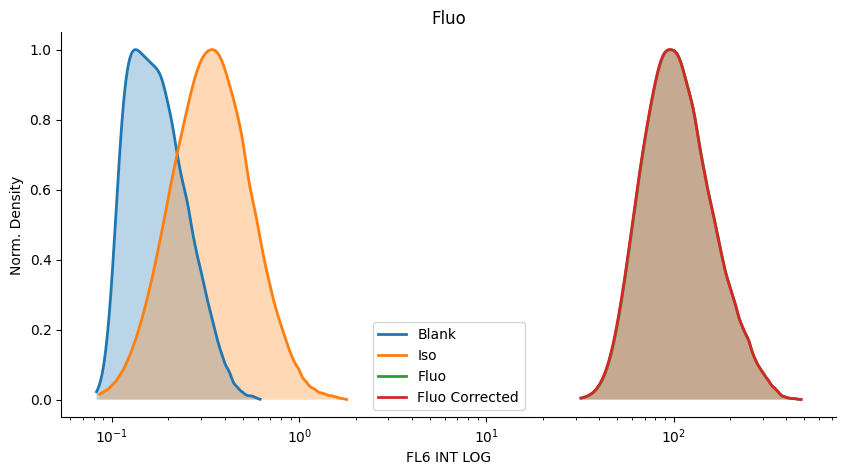

In [14]:
mxlm = np.max([np.max(CnsAllT['Blank']), np.max(CnsAllT['Iso']), np.max(CnsAllT['Fluo'])])
mnlm = np.min([np.min(CnsAllT['Blank']), np.min(CnsAllT['Iso']), np.min(CnsAllT['Fluo'])])




########################################

kss2 = ['Blank', 'Iso', 'Fluo']
tss = [0.001, 0.01, 1]

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(kss2)):
    kde1 = sp.stats.gaussian_kde(CnsAllT[kss2[i]])
    xx1 = np.arange(np.min(CnsAllT[kss2[i]])*0.8, np.max(CnsAllT[kss2[i]]), tss[i])
    
    ax.plot(xx1, kde1(xx1) / np.max(kde1(xx1)), linewidth=2, label = kss2[i])
    plt.fill_between(x=xx1, y1=kde1(xx1)/ np.max(kde1(xx1)), alpha=0.3)

kde4 = sp.stats.gaussian_kde(floCor) # Fluorescence corrected by mean background and isotype control
xx1 = np.arange(np.min(floCor)*0.8, np.max(floCor), tss[i])
ax.plot(xx1, kde4(xx1) / np.max(kde4(xx1)), linewidth=2, label = "Fluo Corrected")
plt.fill_between(x=xx1, y1=kde4(xx1)/ np.max(kde4(xx1)), alpha=0.3)

ax.set_xlabel("FL6 INT LOG")
ax.set_ylabel("Norm. Density")
ax.set_title("Fluo")
ax.spines[['right', 'top']].set_visible(False)
ax.set_xscale('log')
ax.legend()
plt.show()

# Degree of labeling 

In [15]:
DOL_Dat = pd.read_csv(r'C:\IBECPostDocDrive\2024_01_16_NCvsKR\Paper\FlowCytometry\DOL_AbsData.csv')

isoinds = [k for k in range(len(DOL_Dat["Wavelength"])) if 'Isotype' in DOL_Dat["Wavelength"][k]]
antinds = [k for k in range(len(DOL_Dat["Wavelength"])) if 'Anti' in DOL_Dat["Wavelength"][k]]

# DOL of Isotype just as a check that everything is working fine (should be same as for the anti LDH)
iso260 = np.array(DOL_Dat['260nm'][isoinds])
iso650 = np.array(DOL_Dat['650nm'][isoinds])

flu260 = np.array(DOL_Dat['260nm'][antinds])
flu650 = np.array(DOL_Dat['650nm'][antinds])

In [16]:
# Average DOL for Isotype Control
CF = 0.03 # Absorvance correction factor
DF = 1 # Dillution factor
eps = 210000 # Molar extinction coefficient for IgG (M-1 cm-1)
epp = 270000 # Molar extinction coefficient for fluorescent dye (M-1 cm-1)

M = ((iso260-(iso650*0.03))/eps)*DF
DOL_ISO = (iso650/(epp*M))*DF

print("Isotype Control Degree of Labeling: \n")
print("     N("+str(np.mean(DOL_ISO))+", "+str(np.std(DOL_ISO))+")")

Isotype Control Degree of Labeling: 

     N(1.0624376456533222, 0.12981141305932148)


In [17]:
# DOL for Isotype Control
CF = 0.03 # Absorvance correction factor
DF = 1 # Dillution factor
eps = 210000 # Molar extinction coefficient for IgG (M-1 cm-1)
epp = 270000 # Molar extinction coefficient for fluorescent dye (M-1 cm-1)

M = ((flu260-(flu650*0.03))/eps)*DF
DOL_FLU = (flu650/(epp*M))*DF

print("Anti LDH Degree of Labeling: \n")
print("     N("+str(np.mean(DOL_FLU))+", "+str(np.std(DOL_FLU))+")")

Anti LDH Degree of Labeling: 

     N(1.1755511761771886, 0.04084968960598942)


# Compute ERF

In [18]:
def myfuncRev(y):
  return (y - intercept) / slope

def compERF(slope, intercept, FITC, beadsMeanM, CEX):
    
    fig, ax = plt.subplots()
    ax.grid(True, which="both", color='0.85')
    ax.set_axisbelow(True)

    ax.plot( np.arange(np.min(FITC), np.max(FITC)) ,   np.exp(myfunc(np.log(np.arange(np.min(FITC), np.max(FITC)))))   , c='b')

    ax.errorbar(FITC, np.mean(beadsMeanM, axis=0), yerr=np.std(beadsMeanM, axis=0), fmt='o', c='red')
    
    ERF = np.zeros(len(CEX))
    if len(CEX) < 10:
      for i in range(len(CEX)):
          
          ERF[i] = np.exp(myfuncRev(np.log(CEX[i])))
          
          # ax.plot([np.min(FITC), ERF[i]], 
          #         [CEX[i], CEX[i]], c='g')
          ax.arrow(x = np.min(FITC), y = CEX[i], 
                  dx=ERF[i]*0.85, dy=0, color='g',
                  length_includes_head=True,
                  head_width = CEX[i]*0.1, head_length = ERF[i]*0.05)
          
          # ax.plot([ERF[i], ERF[i]],
          #         [CEX[i], np.min(np.mean(beadsMeanM, axis=0))], c='g')
          ax.arrow(x = ERF[i], y = CEX[i], 
                  dx=0, dy=-CEX[i]+np.min(np.mean(beadsMeanM, axis=0)), color='g',
                  length_includes_head=True,
                  head_width = ERF[i]*0.1, head_length = (CEX[0])*0.01)
          
          ax.scatter([ERF[i]], CEX[i], c='g',zorder=10)
          
    else:
      for i in range(len(CEX)):
          ERF[i] = np.exp(myfuncRev(np.log(CEX[i])))
    
      ax.arrow(x = np.min(FITC), y = np.mean(CEX), 
                  dx=np.mean(ERF)*0.85, dy=0, color='g',
                  length_includes_head=True,
                  head_width = np.mean(CEX)*0.1, head_length = np.mean(ERF)*0.05)
      ax.arrow(x = np.mean(ERF), y = np.mean(CEX), 
                    dx=0, dy=-np.mean(CEX)+np.min(np.mean(beadsMeanM, axis=0)), color='g',
                    length_includes_head=True,
                    head_width = np.mean(ERF)*0.1, head_length = np.mean(CEX)*0.01)  
      
      ax.scatter([np.mean(ERF)], np.mean(CEX), c='g',zorder=10)
      ax.set_title('Mean ERF')
    

    ax.set_ylabel('MFU')
    ax.set_xlabel('ERF Value (APC 660/20)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.spines[['right', 'top']].set_visible(False)
    plt.show()
    
    return(ERF)

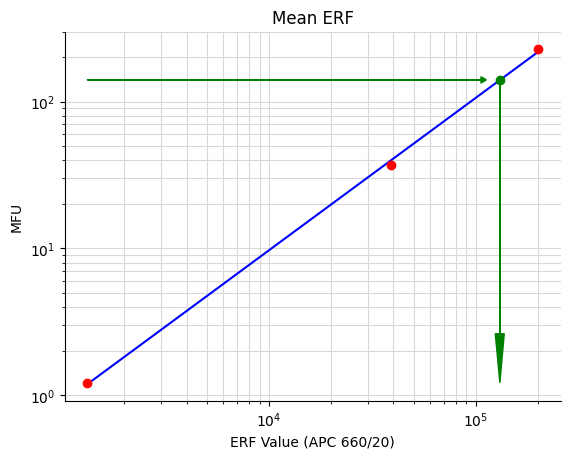

[112752.49136368 116735.44889201 198153.05447275 ... 223725.82670705
 172482.36503864 105188.75800506]


In [121]:
ERFall = compERF(slope, intercept, FITC, beadsMeanM, floCor)
print(ERFall)

NigG = ERFall/np.mean(DOL_FLU)
Nenz = NigG*2

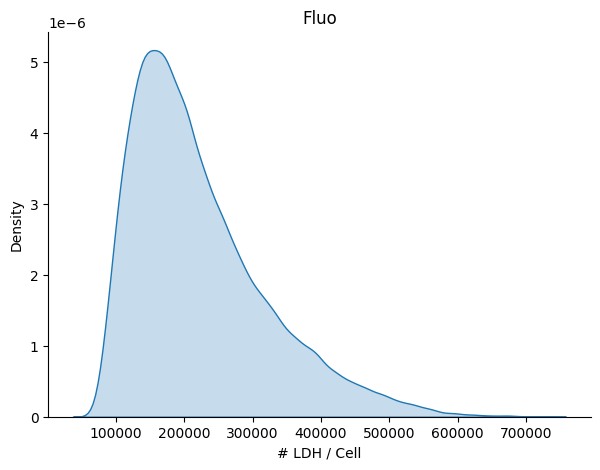

In [122]:
fig, ax = plt.subplots(figsize=(7,5))

sns.kdeplot(data=Nenz, fill=True)

ax.set_xlabel("# LDH / Cell")
ax.set_title("Fluo")
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xscale('log')
# ax.legend()
plt.show()

In [124]:
(np.mean(Nenz)/75000000000)*100

0.0002966664222385436

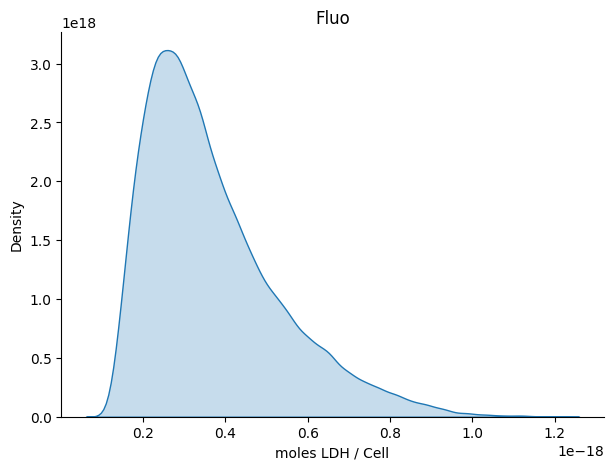

In [130]:
moleLDH = Nenz/(6.023*10**23) # Moles of LDH

fig, ax = plt.subplots(figsize=(7,5))

sns.kdeplot(data=moleLDH, fill=True)

ax.set_xlabel("moles LDH / Cell")
ax.set_title("Fluo")
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xscale('log')
# ax.legend()
plt.show()

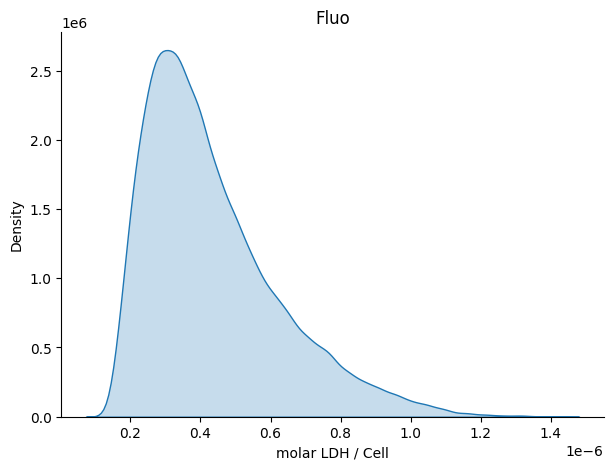

In [131]:
celV = 850; # um^3 according to "In-depth quantitative analysis and comparison of the human hepatocyte and hepatoma cell line HepG2 proteomes"
celVL = celV*1e-15 # In Liters

molarLDH = (moleLDH/celVL) # Molar concentration of LDH per one million cells


fig, ax = plt.subplots(figsize=(7,5))

sns.kdeplot(data=molarLDH, fill=True)

ax.set_xlabel("molar LDH / Cell")
ax.set_title("Fluo")
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xscale('log')
# ax.legend()
plt.show()

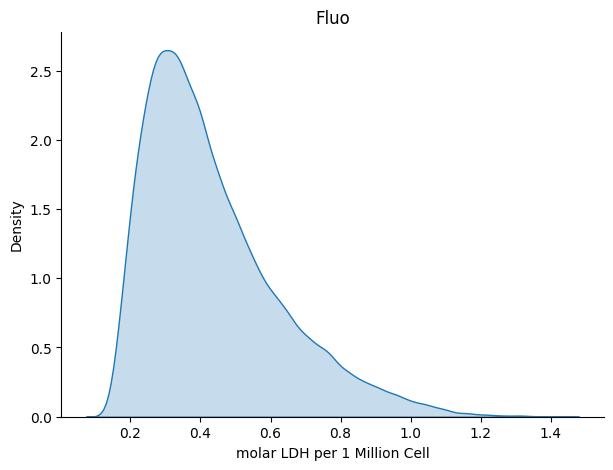

In [132]:
molarLDHMil = molarLDH*(10**6) # Molar concentration of LDH per one million cells

fig, ax = plt.subplots(figsize=(7,5))

sns.kdeplot(data=molarLDHMil, fill=True)

ax.set_xlabel("molar LDH per 1 Million Cell")
ax.set_title("Fluo")
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xscale('log')
# ax.legend()
plt.show()

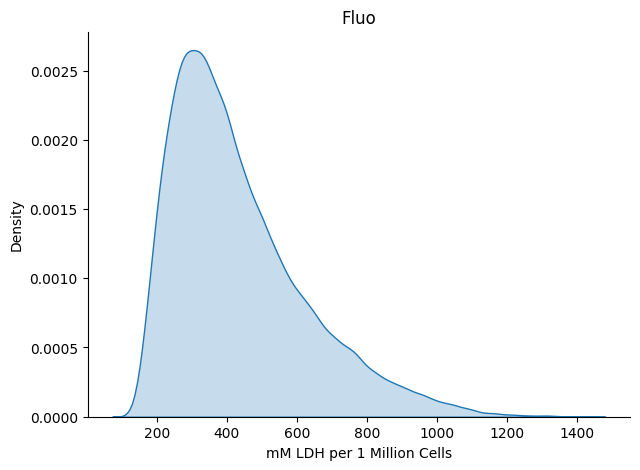

In [133]:
mMLDH = molarLDHMil*1000

fig, ax = plt.subplots(figsize=(7,5))

sns.kdeplot(data=mMLDH, fill=True)

ax.set_xlabel("mM LDH per 1 Million Cells")
ax.set_title("Fluo")
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xscale('log')
# ax.legend()
plt.show()

In [ ]:
# moleLDH = Nenz/(6.023*(10**(23))) # Moles of LDH

# celV = 850; # um^3 according to "In-depth quantitative analysis and comparison of the human hepatocyte and hepatoma cell line HepG2 proteomes"
# celVL = celV*1e-15 # In Liters

# molarLDH = (moleLDH/celVL)*(10**6) # Molar concentration of LDH per one million cells

# mMLDH = molarLDH*1000

In [134]:
# fig, ax = plt.subplots(figsize=(7,5))

# sns.kdeplot(data=mMLDH, fill=True)

# ax.set_xlabel("LDH (mM)")
# ax.set_title("Fluo")
# ax.spines[['right', 'top']].set_visible(False)
# # ax.set_xscale('log')
# # ax.legend()
# plt.show()

In [137]:
sp.stats.mode(mMLDH[~np.isnan(mMLDH)]*1000*3)[0]

1184182.26683259

In [138]:
np.std(mMLDH[~np.isnan(mMLDH)]*1000*3)

580305.0513069752

# Save Data for Figure

In [139]:
dfFinal = pd.DataFrame(mMLDH)
dfFinal.to_csv(r"C:\IBECPostDocDrive\2024_01_16_NCvsKR\DataProcessingInference\LDHQuantification_Processing\LDHConcentration_1Mil_mM.csv")